# Scott Breitbach
## 14-Feb-2021
## DSC540, Weeks 9-10

# 1. Activity 9: Extracting the Top 100 eBooks from Gutenberg

## 1) Import the necessary libraries, including **regex** and **beautifulsoup**.

In [ ]:
import re
import requests
from bs4 import BeautifulSoup
import urllib.request, urllib.parse, urllib.error
import ssl

## 2) Check the SSL certificate.

In [ ]:
# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

## 3) Read the HTML from the URL.

In [3]:
url = "https://www.gutenberg.org/browse/scores/top"
response = requests.get(url)

## 4) Write a small function to check the status of the web request.

In [4]:
def statusCheck(resp):
    if resp.status_code==200:
        print('Web request successful!')
        return 1
    else:
        print('Web request failed.')
        return -1

## 5) Decode the response and pass this on to BeautifulSoup for HTML parsing.

In [5]:
def decodeResponse(resp):
    def decodeContent(r, encoding):
        return(r.content.decode(encoding))
    
    def encodingCheck(r):
        return (r.encoding)
    
    status = statusCheck(resp)
    
    if status==1:
        contents = decodeContent(response, encodingCheck(response))
        return contents
    else:
        print("Sorry, could not reach the web page!")
        return -1
    
contents = decodeResponse(response)

Web request successful!


In [6]:
soup = BeautifulSoup(contents, 'html.parser')

## 6) Find all the **href** tags and store them in the list of links. Check what the list looks like - print the first 30 elements.

In [7]:
soup.find_all('li')[31].a.get('href')

'/ebooks/84'

Find all the **href** tags and store them in the list of links:

In [8]:
listOfLinks = []
for link in soup.find_all('li'):
    lnk = link.a.get('href')
    listOfLinks.append(lnk)
#     print(lnk)
len(listOfLinks)

672

Check what the list looks like - print the first 30 elements:

In [9]:
listOfLinks[:30]

['/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7',
 '#authors-last7',
 '#books-last30']

In [10]:
# print(soup.text[1000:1500])

A bit more, to see where the book links start:

In [11]:
listOfLinks[30:40]

['#authors-last30',
 '/ebooks/84',
 '/ebooks/1342',
 '/ebooks/1080',
 '/ebooks/11',
 '/ebooks/98',
 '/ebooks/76',
 '/ebooks/5200',
 '/ebooks/25344',
 '/ebooks/844']

## 7) Use a regular expression to find the numeric digits in these links. These are the file numbers for the top 100 eBooks.

In [12]:
listOfLinks[31]

'/ebooks/84'

Use a regular expression to find the numeric digits in these links:

In [13]:
pattern = r"/ebooks/[0-9]"
prog = re.compile(r'[0-9]*$')

In [14]:
# prog.search(listOfLinks[31]).group()

These are the file numbers for the top 100 eBooks:

In [15]:
i=0
for link in listOfLinks:
    if re.match(pattern, link):
#         print(link)
        print(prog.search(link).group())
    # Stop after 20 iterations, to keep this short
        i += 1
        if i >= 20:
            break

84
1342
1080
11
98
76
5200
25344
844
2701
1661
2542
1250
1952
1260
64317
174
46
160
74


## 8) Initialize the empty list to hold the file numbers over an appropriate range and use **regex** to find the numeric digits in the link **href** string. Use the `.findall()` method.

Initialize the empty list to hold the file numbers over an appropriate range:

In [16]:
bookNums = []

Use regex to find the numeric digits in the link href string. Use the findall method:

In [17]:
for link in listOfLinks:
    if re.match(pattern, link):
        digits = re.findall('[0-9]+', link)[0]
        bookNums.append(int(digits))

In [18]:
print("Top 100 books, by file number:")
print(bookNums)

Top 100 books, by file number:
[84, 1342, 1080, 11, 98, 76, 5200, 25344, 844, 2701, 1661, 2542, 1250, 1952, 1260, 64317, 174, 46, 160, 74, 219, 2852, 64592, 205, 23, 408, 345, 43, 1400, 16, 16328, 1497, 1232, 158, 55, 2591, 19942, 514, 4300, 3207, 6133, 768, 215, 45, 2554, 2600, 2814, 120, 1184, 36, 57775, 42108, 135, 58585, 730, 64586, 244, 5740, 996, 113, 829, 140, 3825, 2500, 14976, 203, 15399, 147, 1727, 6130, 1001, 19033, 42324, 3600, 902, 64585, 43453, 41, 766, 25929, 209, 236, 1998, 161, 35, 64587, 7370, 851, 64589, 4517, 863, 972, 3296, 11030, 20203, 4363, 10623, 32415, 1934, 8800, 84, 1342, 11, 1080, 98, 5200, 1661, 844, 25344, 2701, 2542, 1952, 76, 174, 64317, 1260, 1250, 160, 408, 43, 46, 219, 345, 1232, 205, 16, 23, 16328, 74, 1400, 2852, 6133, 57775, 1497, 4300, 19942, 55, 2814, 514, 158, 2591, 3207, 120, 2600, 768, 215, 42108, 45, 2554, 1184, 5740, 996, 244, 3825, 58585, 203, 36, 902, 135, 3600, 43453, 6130, 1727, 140, 15399, 829, 1001, 11030, 2500, 20203, 113, 7370, 147,

## 9) What does the **soup** object's text look like? 
Use the `.text` method and print the first 2,000 characters:

In [19]:
# soup.text[:2000]
print(soup.text[:2000].replace('\n\n', ''))  # Saving space by removing multiple newlines

Top 100 | Project GutenbergMenu▾About
          ▾▾
About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of UseSearch and Browse
      	  ▾▾
Book Search
Bookshelves
Frequently Downloaded
Offline CatalogsHelp
          ▾▾
All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →
Donate
DonationFrequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.Downloaded Books
2021-02-19199180
last 7 days1366919
last 30 days5806503Top 100 EBooks yesterday
Top 100 Authors yesterday
Top 100 EBooks last 7 days
Top 100 Authors last 7 day

## 10) Search in the extracted text (using regex) from the soup object to find the names of the top 100 eBooks (yesterday's ranking).

In [20]:
soup.find_all('li')[31].a.get('href')

'/ebooks/84'

In [21]:
len(soup.find_all('ol'))

6

In [22]:
topHundy = soup.find_all('ol')[0]

In [23]:
len(topHundy.find_all('li'))

100

In [24]:
topHundy.find_all('li')[0]

<li><a href="/ebooks/84">Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (3260)</a></li>

In [25]:
topHundy.find_all('li')[0].text

'Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (3260)'

In [26]:
i=0
for book in topHundy.find_all('li'):
    print(book.text)
# Stop after 20 iterations, to keep this short
    i += 1
    if i >= 20:
        break

Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (3260)
Pride and Prejudice by Jane Austen (2163)
A Modest Proposal by Jonathan Swift (1122)
Alice's Adventures in Wonderland by Lewis Carroll (1011)
A Tale of Two Cities by Charles Dickens (944)
Adventures of Huckleberry Finn by Mark Twain (893)
Metamorphosis by Franz Kafka (871)
The Scarlet Letter by Nathaniel Hawthorne (845)
The Importance of Being Earnest: A Trivial Comedy for Serious People by Oscar Wilde (812)
Moby Dick; Or, The Whale by Herman Melville (806)
The Adventures of Sherlock Holmes by Arthur Conan Doyle (729)
Et dukkehjem. English by Henrik Ibsen (729)
Anthem by Ayn Rand (705)
The Yellow Wallpaper by Charlotte Perkins Gilman (681)
Jane Eyre: An Autobiography by Charlotte Brontë (672)
The Great Gatsby by F. Scott  Fitzgerald (659)
The Picture of Dorian Gray by Oscar Wilde (655)
A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens (609)
The Awakening, and Selected Short Stori

## 11) Create a starting index. It should point to the text *Top 100 EBooks yesterday*. Use the `.splitlines()` method of soup.text. It splits the lines of text of the soup object.

In [27]:
# soup.text.find("Top 100 EBooks yesterday")

In [28]:
# soup.text.splitlines()

In [29]:
soup.text.splitlines().index("Top 100 EBooks yesterday")

113

In [30]:
soup.text.splitlines()[113]

'Top 100 EBooks yesterday'

In [31]:
startInd = soup.text.splitlines().index("Top 100 EBooks yesterday")

In [32]:
soup.text.splitlines()[startInd:startInd+15]

['Top 100 EBooks yesterday',
 'Top 100 Authors yesterday',
 'Top 100 EBooks last 7 days',
 'Top 100 Authors last 7 days',
 'Top 100 EBooks last 30 days',
 'Top 100 Authors last 30 days',
 '',
 '',
 'Top 100 EBooks yesterday',
 '',
 'Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (3260)',
 'Pride and Prejudice by Jane Austen (2163)',
 'A Modest Proposal by Jonathan Swift (1122)',
 "Alice's Adventures in Wonderland by Lewis Carroll (1011)",
 'A Tale of Two Cities by Charles Dickens (944)']

Looks like there's more than one instance of "Top 100 EBooks yesterday".

In [33]:
soup.text.splitlines()[startInd+8]

'Top 100 EBooks yesterday'

Add a couple more to get to the first book:

In [34]:
startInd = soup.text.splitlines().index("Top 100 EBooks yesterday")+10

## 12) Loop 0-100 to add the strings of the next 100 lines to this temporary list. Hint: use the `.splitlines()` method.

In [35]:
topBooks = []
for book in soup.text.splitlines()[startInd:startInd+100]:
    topBooks.append(book)

In [36]:
topBooks[:5], topBooks[-5:]

(['Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (3260)',
  'Pride and Prejudice by Jane Austen (2163)',
  'A Modest Proposal by Jonathan Swift (1122)',
  "Alice's Adventures in Wonderland by Lewis Carroll (1011)",
  'A Tale of Two Cities by Charles Dickens (944)'],
 ['Beyond Good and Evil by Friedrich Wilhelm Nietzsche (185)',
  'Plays by Susan Glaspell (183)',
  'The Nursery Rhymes of England (182)',
  'Songs of Innocence, and Songs of Experience by William Blake (179)',
  'An Index of The Divine Comedy by Dante by Dante Alighieri (179)'])

## 13) Use a regular expression to extract only the text from the name strings and append it to an empty list. Use `.match()` and `.span()` to find the indices and use them.

In [37]:
topBooks[0]

'Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (3260)'

In [38]:
prog = re.compile(r'\s\([0-9]{1,5}\)')
prog.search(topBooks[0]).group()

' (3260)'

In [39]:
prog.match(topBooks[0], pos=len(topBooks[0])-len(prog.search(topBooks[0]).group()))

<re.Match object; span=(70, 77), match=' (3260)'>

In [40]:
prog.match(topBooks[0], pos=len(topBooks[0])-len(prog.search(topBooks[0]).group())).span()

(70, 77)

In [41]:
topBooks[0][:34]

'Frankenstein; Or, The Modern Prome'

In [42]:
bookTitles = []

for book in topBooks:
    s, e = prog.match(book, pos=len(book)-len(prog.search(book).group())).span()
#     print(book[:s])
    bookTitles.append(book[:s])

In [43]:
len(bookTitles)

100

In [44]:
bookTitles[:5], bookTitles[-5:]

(['Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley',
  'Pride and Prejudice by Jane Austen',
  'A Modest Proposal by Jonathan Swift',
  "Alice's Adventures in Wonderland by Lewis Carroll",
  'A Tale of Two Cities by Charles Dickens'],
 ['Beyond Good and Evil by Friedrich Wilhelm Nietzsche',
  'Plays by Susan Glaspell',
  'The Nursery Rhymes of England',
  'Songs of Innocence, and Songs of Experience by William Blake',
  'An Index of The Divine Comedy by Dante by Dante Alighieri'])

# 2. Activity 10: Building Your Own Movie Database by Reading an API

## 1) Import **urllib.request**, **urllib.parse**, **urllib.error**, and **json**.

In [45]:
import urllib.request, urllib.parse, urllib.error
import json
import os
from IPython.display import Image, display

## 2) Load the secret API key from a JSON file stored in the same folder in a variable, by using `json.load()`.

## 3) *(2a)* Obtain a key and store it in JSON as **APIkeys.json**.
Done!

## 4) *(2b)* Open the **APIkeys.json** file.

In [46]:
with open('APIkey.json') as f:
    key = json.load(f)['OMDBapi']    

# 5) Assign the OMDB portal as a string to a variable.
(http://www.omdbapi.com/?)

In [47]:
omdbPortal = "http://www.omdbapi.com/?"

## 6) Create a variable called **apikey** with the last portion of the URL (**&apikey=secretapikey**), where **secretapikey** is your own API key.
The movie name portion i.e. "t=movie_name" will be addressed later

In [48]:
apiKey = "&apikey="+key

## 7) Write a utility function called **print_json** to print the movie data from a JSON file (which we will get from the portal).

In [49]:
def print_json(movieData):
    """
    Function to print movie data from a JSON file.
    """
    data = json.loads(movieData)
    for k, v, in data.items():
        print("{}:\n   {}".format(k, v))

In [50]:
def fetchMovieData(movieTitle):
    """
    Function to retrieve JSON data for a specified 
    movie from the "http://www.omdbapi.com/?" API.
    """
    urlTitle = urllib.parse.urlencode({'t': str(movieTitle)})
    url = omdbPortal + urlTitle + apiKey
    
    try:
        uh = urllib.request.urlopen(url)
    except HTTPError as e:
        print("So sorry, but we could not retreive anything on {}"
              .format(movieTitle))
        return None
    except URLError as e:
        print('Failed to reach a server. You know how it is.')
        print("Reason: {}".format(e.reason))
        return None
    else:
        data = uh.read().decode()
        print("Retrieved data on {}. Total {} characters read."
             .format(movieTitle, len(data)))
        return data

In [51]:
# movieTitle = "Titanic"
movieTitle = str(input("Enter the name of a movie: "))
movieData = fetchMovieData(movieTitle)

Enter the name of a movie:  Monty Python's Life of Brian


Retrieved data on Monty Python's Life of Brian. Total 996 characters read.


In [52]:
print_json(movieData)

Title:
   Monty Python's Life of Brian
Year:
   1979
Rated:
   R
Released:
   17 Aug 1979
Runtime:
   94 min
Genre:
   Comedy
Director:
   Terry Jones
Writer:
   Graham Chapman, John Cleese, Terry Gilliam, Eric Idle, Terry Jones, Michael Palin
Actors:
   Graham Chapman, John Cleese, Terry Gilliam, Eric Idle
Plot:
   Born on the original Christmas in the stable next door to Jesus Christ, Brian of Nazareth spends his life being mistaken for a messiah.
Language:
   English, Latin
Country:
   UK
Awards:
   N/A
Poster:
   https://m.media-amazon.com/images/M/MV5BMzAwNjU1OTktYjY3Mi00NDY5LWFlZWUtZjhjNGE0OTkwZDkwXkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_SX300.jpg
Ratings:
   [{'Source': 'Internet Movie Database', 'Value': '8.1/10'}, {'Source': 'Rotten Tomatoes', 'Value': '95%'}, {'Source': 'Metacritic', 'Value': '77/100'}]
Metascore:
   77
imdbRating:
   8.1
imdbVotes:
   367,934
imdbID:
   tt0079470
Type:
   movie
DVD:
   N/A
BoxOffice:
   $20,206,622
Production:
   Paramount
Website:
   N/A
Response:


## 8) Write a utility function to download a poster of the movie based on the information from the JSON dataset and save it in your local folder.
Use the **os** module. The poster data is stored in the JSON key **Poster**. Use the Python command to open a file and write the poster data. Close the file after you're done. This functon will save the poster data as an image file.

In [53]:
def posterTime(movieData):
    """
    This function retrieves, saves, and displays
    the poster image for the searched movie.
    """
    movieJSON = json.loads(movieData)
    
    # Grab movie Title and Poster data:
    movie = movieJSON['Title']
    poster = movieJSON['Poster']
    imgData = urllib.request.urlopen(poster).read()
    
    # Generate file info and save image:
    extension = movieJSON['Poster'].split('.')[-1]
    fileName = "{}.{}".format(str(movie), extension)
    try:
        with open(fileName, 'wb') as f:
            f.write(imgData)
        print('The following {} image was saved as:\n\t"{}"'
              .format(extension.upper(), fileName))
        display(Image(filename=fileName))
    except:
        print("Something went wrong. Image could not be saved.")

The following JPG image was saved as:
	"Monty Python's Life of Brian.jpg"


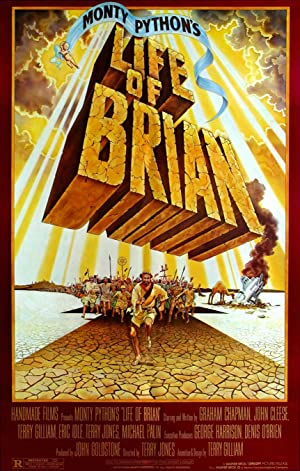

In [54]:
posterTime(movieData)

# 3. Connect to the Twitter API and do a simple data pull.

In [55]:
import requests
import os
import json
from dotenv import load_dotenv

In [56]:
%load_ext dotenv
%dotenv

## a.-g. Set up a Twitter developer account and obtain necessary keys/tokens.

In [57]:
# os.environ["CONSUMER_KEY"] = "<API key>"
# os.environ["CONSUMER_SECRET"] = "<API secret key>"
# os.environ["BEARER_TOKEN"] = "<Bearer token>"

In [58]:
load_dotenv("CONSUMER_KEY")
load_dotenv("CONSUMER_SECRET")
load_dotenv("BEARER_TOKEN")

True

Donezo.

## h. Connect to the Twitter API to pull data searching for "Bellevue University" and "Data Science" or something else interesting.
* [How to Create a Twitter App and API Interface via Python](https://www.sitepoint.com/how-to-create-a-twitter-app-and-api-interface-via-python/)
* [Welcome Python-Twitter's Documentation!](https://python-twitter.readthedocs.io/en/latest/)

In [59]:
def twitterSearch(searchTerms):
    """
    Takes search term, generates a URL, and reaches out to Twitter API
    """
    # Load token:
    bearerToken = os.environ.get("BEARER_TOKEN")
    
    # Generate URL:
    query = f"{searchTerms} -is:retweet lang:en"
    tweetFields = "expansions=author_id"
    url = f"https://api.twitter.com/2/tweets/search/recent?query={query}&{tweetFields}"
    
    # Establish headers and connect to endpoint:
    headers = {"Authorization": f"Bearer {bearerToken}"}
    response = requests.request("GET", url, headers=headers)
    print("Status:", response.status_code)
    if response.status_code !=200:
        raise Exception(response.status_code, response.text)
    return response.json()

In [60]:
def printTweets(response):
    print(f"\nHERE'S THE TOP 10 TWEETS FOR '{search}':\n")
    i=0
    for tweet in response['data']:
        i+=1
        print('-'*20)
        print(f"\033[1m#{i}:\033[0m")
        print(tweet['text'])

In [61]:
search = str(input("Enter your Twitter search term(s):"))
tweets = twitterSearch(search)
printTweets(tweets)

Enter your Twitter search term(s): Data Science


Status: 200

HERE'S THE TOP 10 TWEETS FOR 'Data Science':

--------------------
#1:
One of the biggest issues with social science methods and statistics books are the microaggressions within examples. It’s really hard to learn the concept when the data is about rates of race- or class- based educational success, homophobia, or anti-abortion stances.
--------------------
#2:
Biden approves major disaster declaration for Texas: FEMA https://t.co/8uBnJMZOYg #3Novices #Meghashyam Thiruveedula #Data Science #Machine Learning
--------------------
#3:
Correlation Analysis Using R: ArticleVideos This article was published as a part of the Data Science Blogathon. Introduction Can you tell how the prices of gold will change ... The post Correlation Analysis Using R appeared first on Analytics Vidhya. https://t.co/NUSb3SDkKN https://t.co/szzjW0XhpP
--------------------
#4:
Women in Data Science (WiDS) Announces WiDS Workshops Initiative https://t.co/pKQpQf0TdB
--------------------
#5:
@EssexPR We

# 4. Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete.  
a) Line  
b) Scatter  
c) Bar  
d) Histogram  
e) Density Plot  
f) Pie Chart  
You are free to use Matplotlib, Seaborn or another package if you prefer.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
plt.rc('figure', figsize=(10, 6))

### Load cleaned candy data from previous week:

In [64]:
candyDF = pd.read_csv('candy_cleaned.csv')

## Scatter Plot

Add an Hour column for hour of the day:

In [65]:
candyDF['Hour'] = pd.to_datetime(candyDF.Timestamp).dt.hour

Plot Age against hour of the day to see if older people tend to be early risers and younger people night owls:  
Note: With Regression!

[Text(0.5, 0, 'Hour of Day'), Text(0, 0.5, 'Age')]

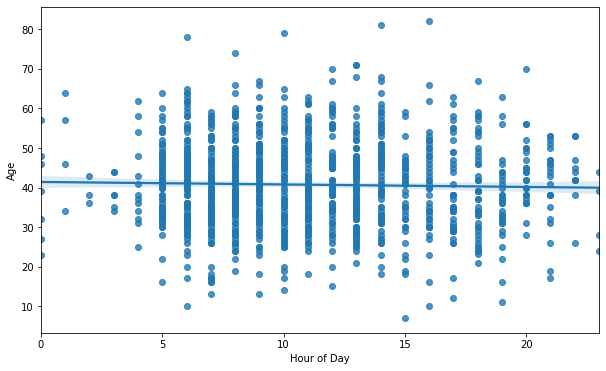

In [66]:
plot = sns.regplot(x='Hour', y='Age', data=candyDF)
plot.set(xlabel="Hour of Day", ylabel='Age')

Not really. That line appears pretty flat.  

Here's the same data as a `jointplot()`, showing histograms of each of the variables at the top and right sides:

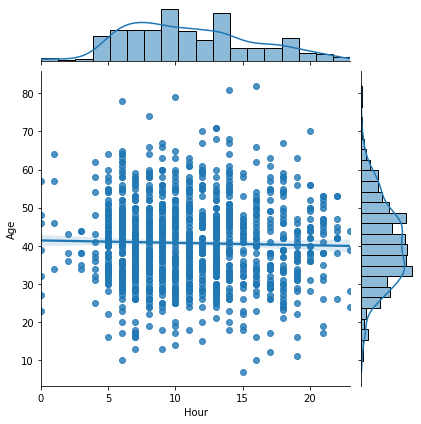

In [67]:
plot = sns.jointplot(x='Hour', y='Age', data=candyDF, kind='reg')

This is helpful to visualize the distribution of the individual variables.

Here it is broken down by Gender:

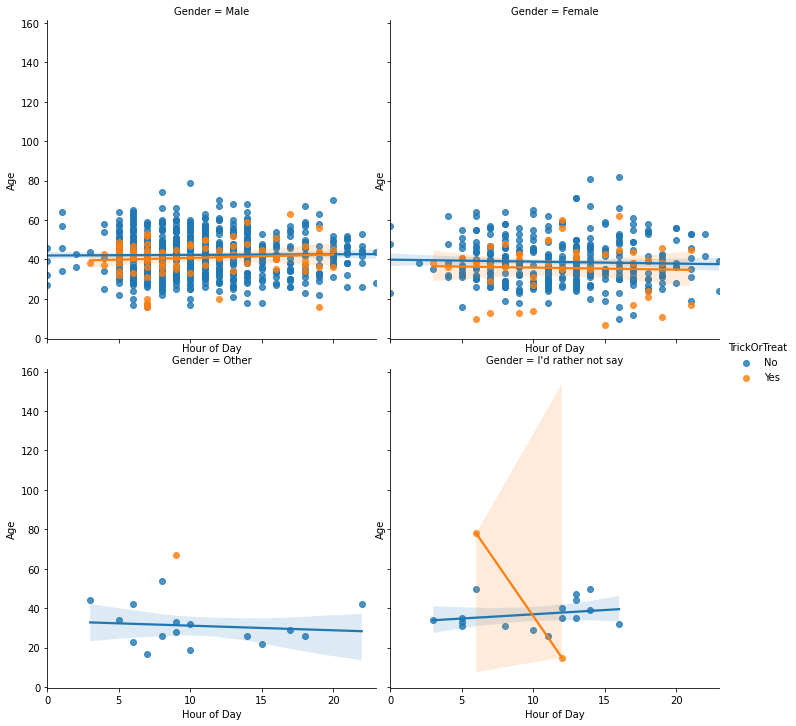

In [68]:
plot = sns.lmplot(x='Hour', y='Age', hue='TrickOrTreat',
                  col='Gender', col_wrap=2, data=candyDF)
plot.set(xlabel="Hour of Day", ylabel='Age')

## Box Plot

See the distribution of the Age of respondents for each reported Gender:

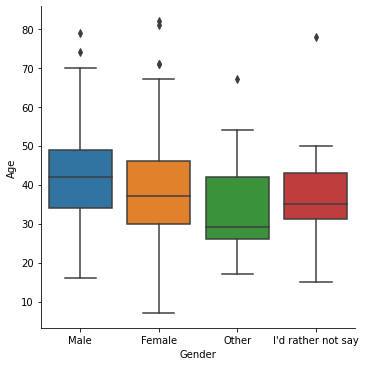

In [69]:
sns.catplot(x='Gender', y='Age', kind='box', data=candyDF)

Broken down by whether or not they went trick or treating:

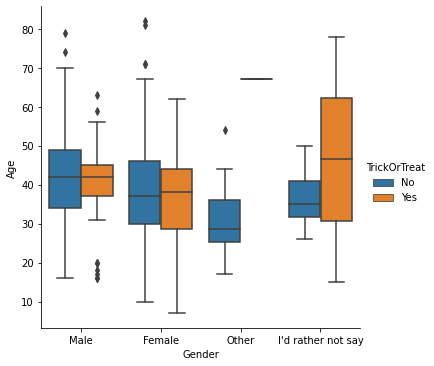

In [70]:
sns.catplot(x='Gender', y='Age', kind='box', hue='TrickOrTreat', data=candyDF)

## Violin Plot

Same data as the previous box plot, but in a violin format, condensed (split) to save space, and with lines added to represent the data points:

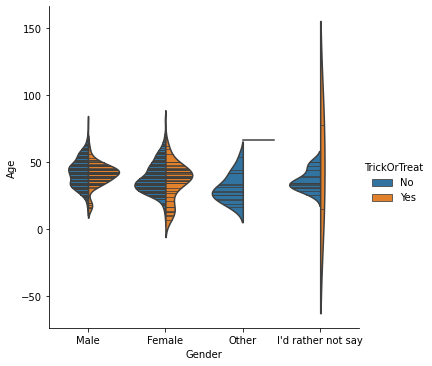

In [71]:
sns.catplot(x='Gender', y='Age', kind='violin', hue='TrickOrTreat',
            split=True, inner='stick', data=candyDF)

## Bar Chart

Nerds:

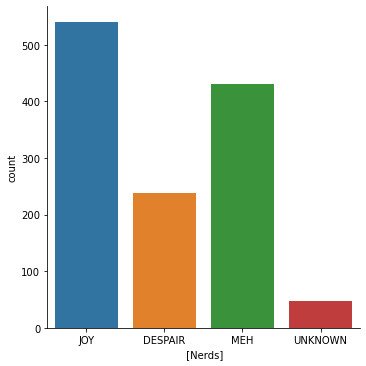

In [72]:
sns.catplot(x=' [Nerds]', kind='count', data=candyDF)

Twix:

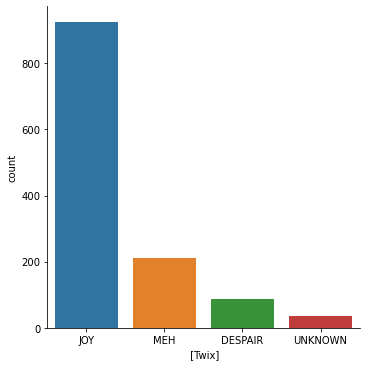

In [73]:
sns.catplot(x=' [Twix]', kind='count', data=candyDF)

Of the people surveyed, it would appear Twix are more popular than Nerds.